In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
store_sales = pd.read_csv('Stores.csv')

In [3]:
store_sales.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [5]:
store_sales.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [6]:
for column_name in store_sales.columns:
    unique_values = len(store_sales[column_name].unique())
    print("Column '{column_name}' has '{unique_values}' unique values".format(column_name = column_name, 
                                                                              unique_values = unique_values))

Column 'Store ID ' has '896' unique values
Column 'Store_Area' has '583' unique values
Column 'Items_Available' has '616' unique values
Column 'Daily_Customer_Count' has '130' unique values
Column 'Store_Sales' has '816' unique values


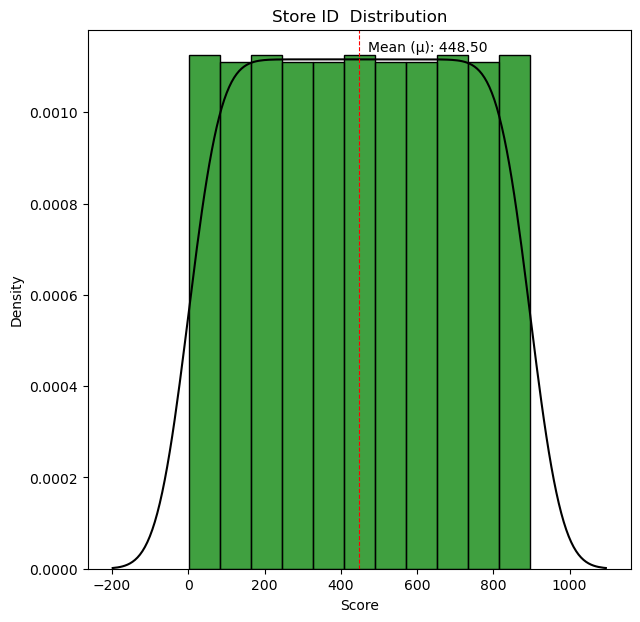

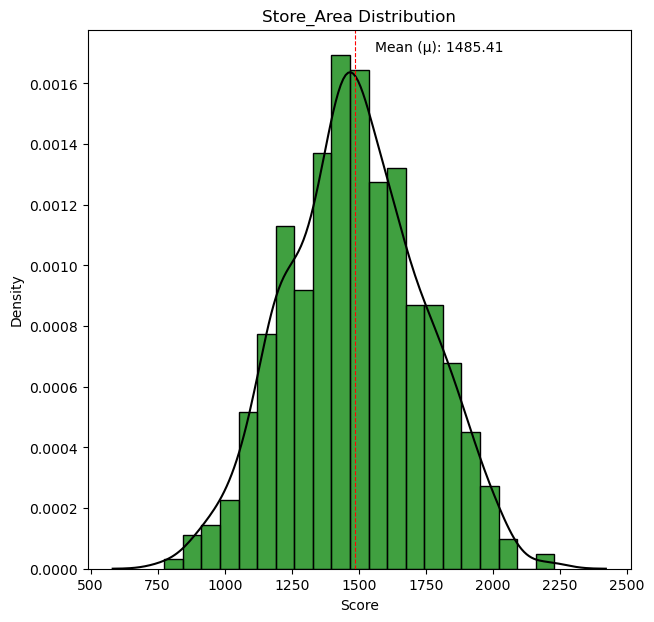

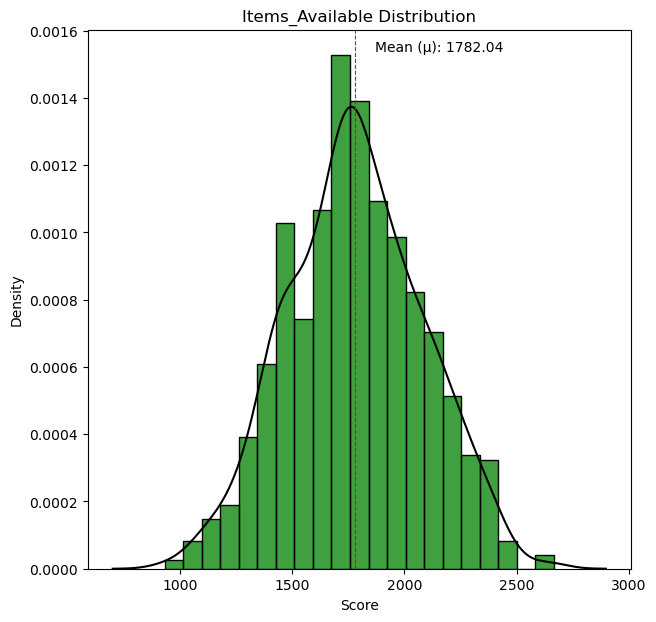

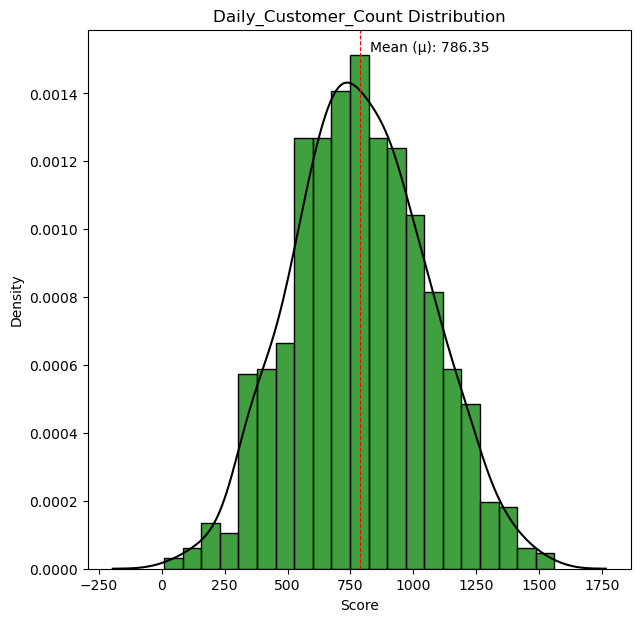

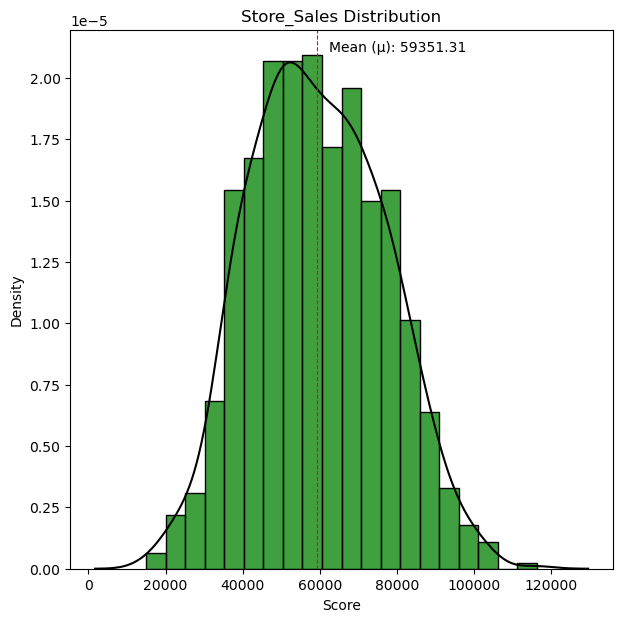

In [7]:
for column_name in store_sales.columns:
    plt.figure(figsize = (7,7))
    plt.title("{column_name} Distribution".format(column_name = column_name))
    sns.histplot(store_sales[column_name], stat = 'density', color = 'green')
    sns.kdeplot(store_sales[column_name], color = 'black')
    plt.axvline(store_sales[column_name].mean(), color ='red',linestyle = '--', linewidth = 0.8)
    min_ylim, max_ylim = plt.ylim()
    plt.text(store_sales[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(store_sales[column_name].mean()))
    plt.xlabel("Score")
    plt.ylabel("Density")
    plt.show()   

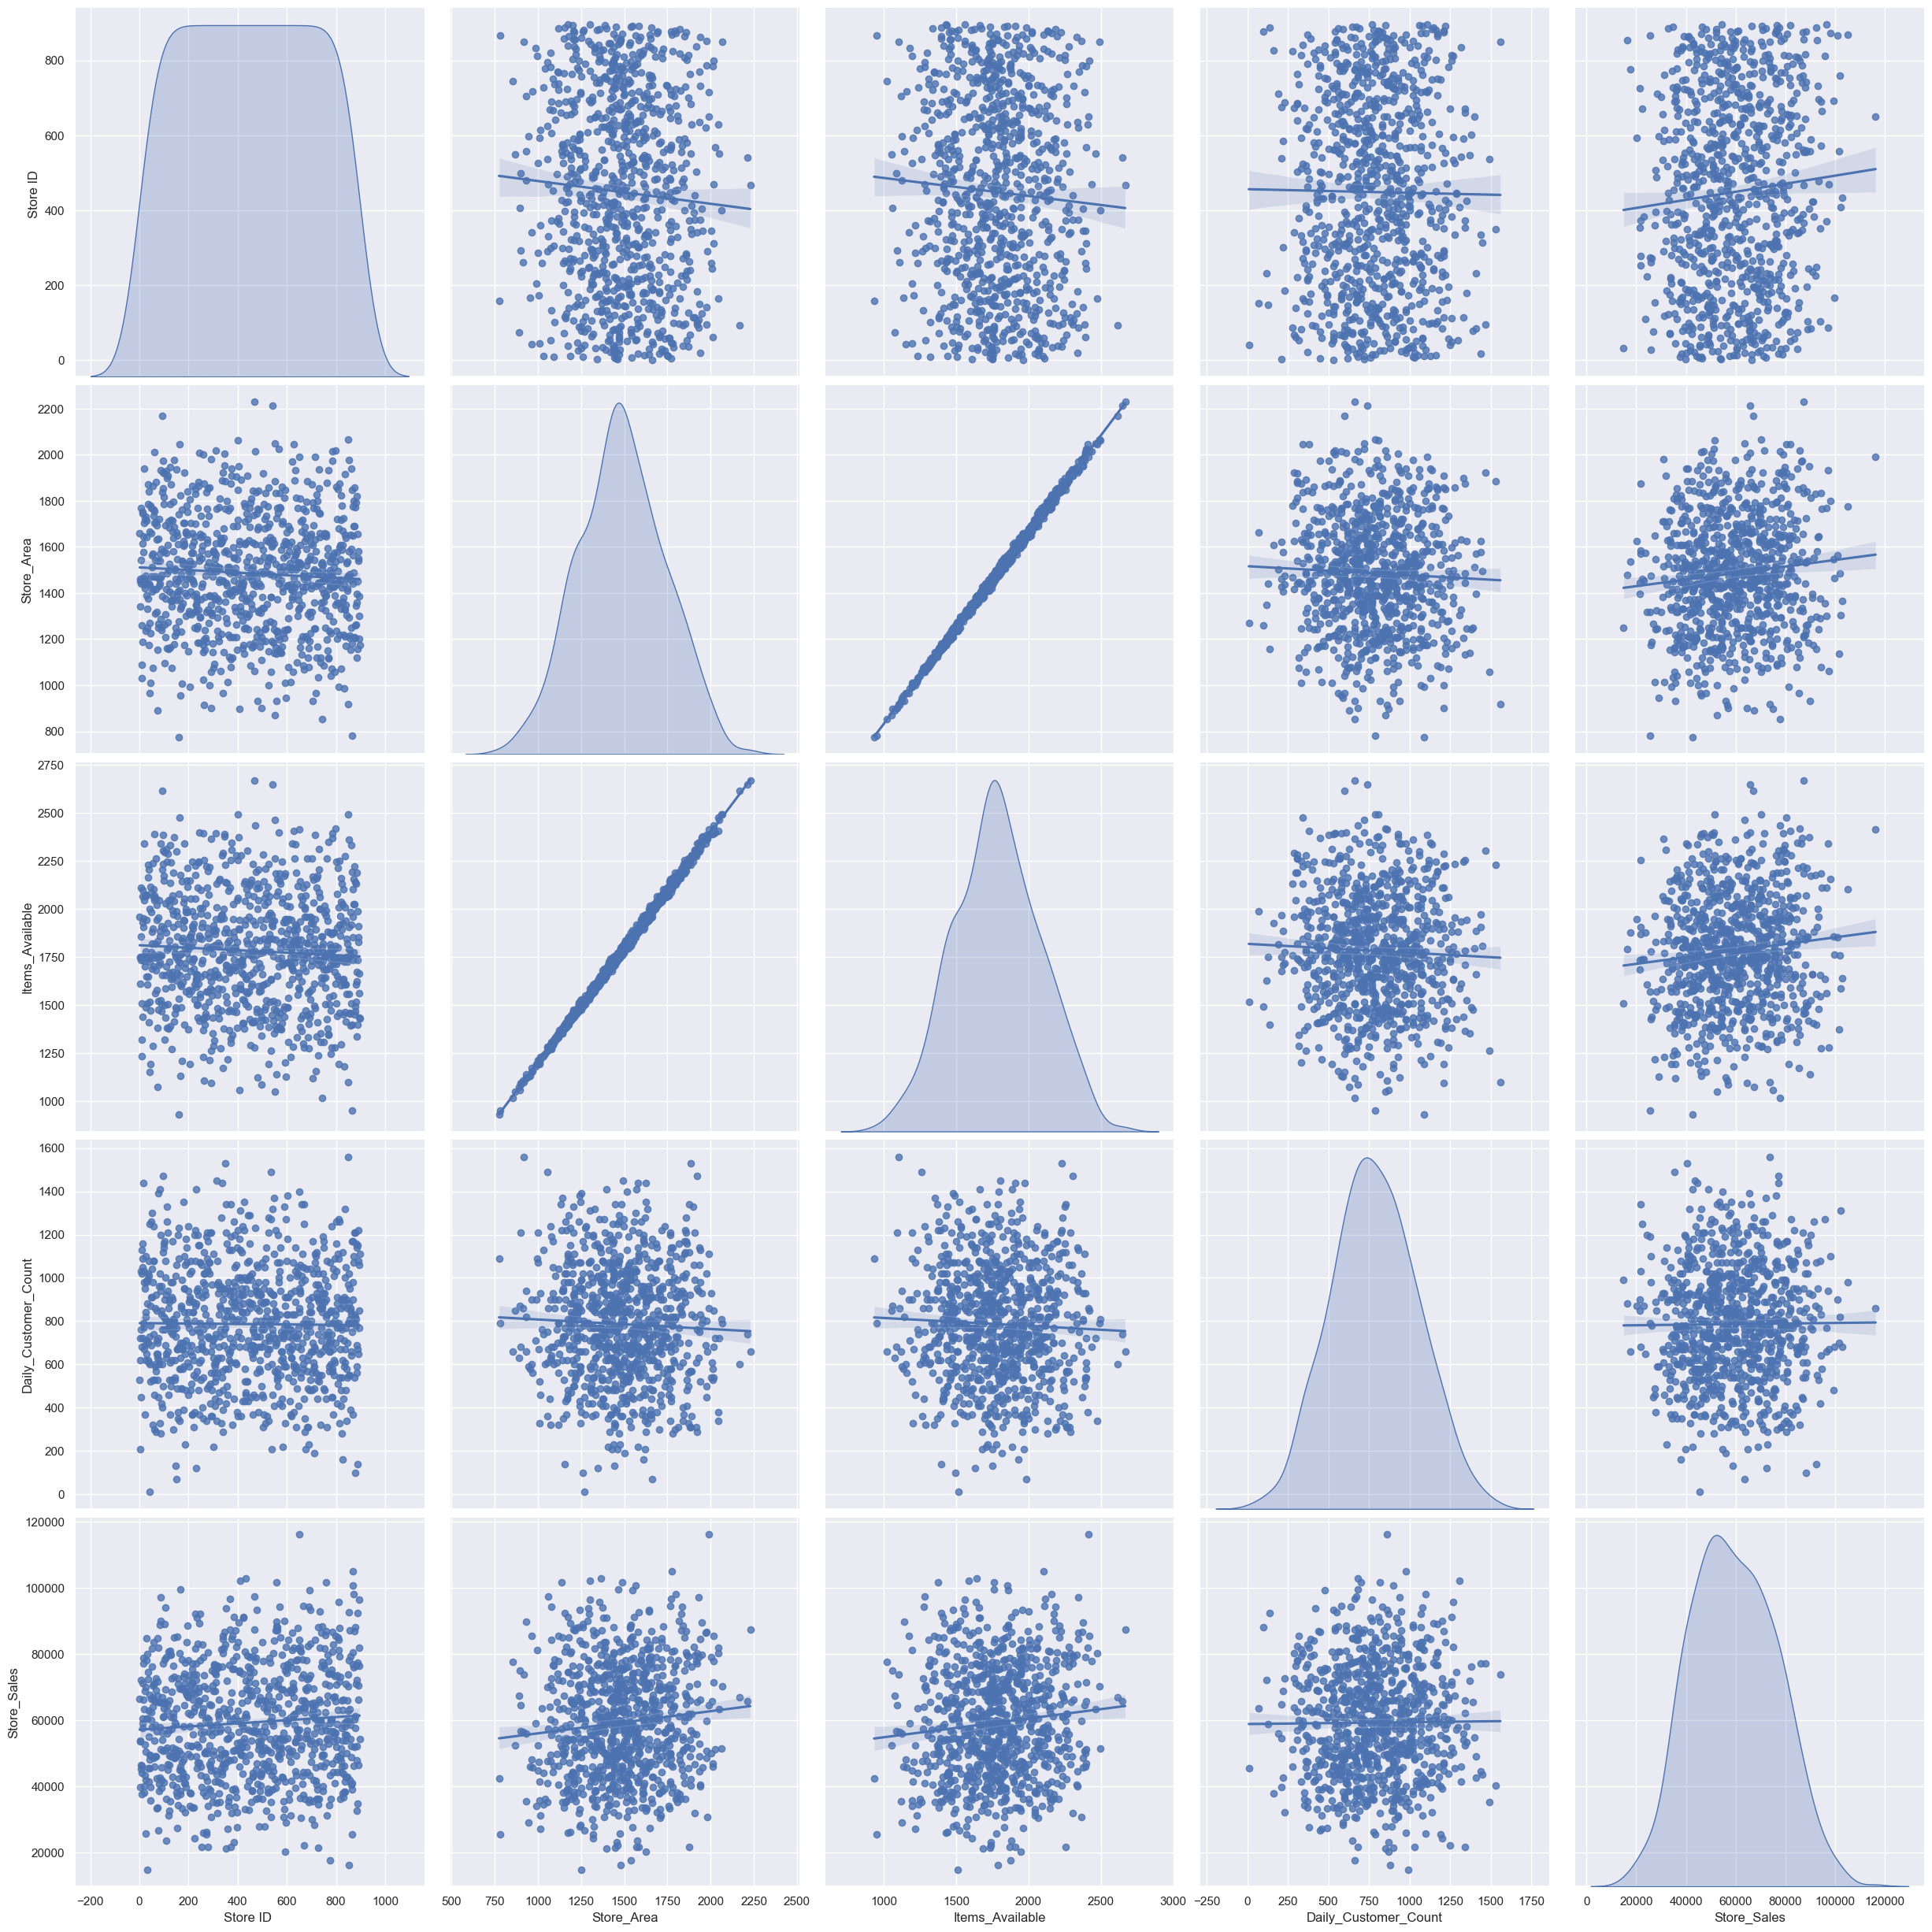

In [8]:
sns.set()
sns.pairplot(store_sales, height = 5, kind = 'reg', diag_kind = 'kde')
plt.show()

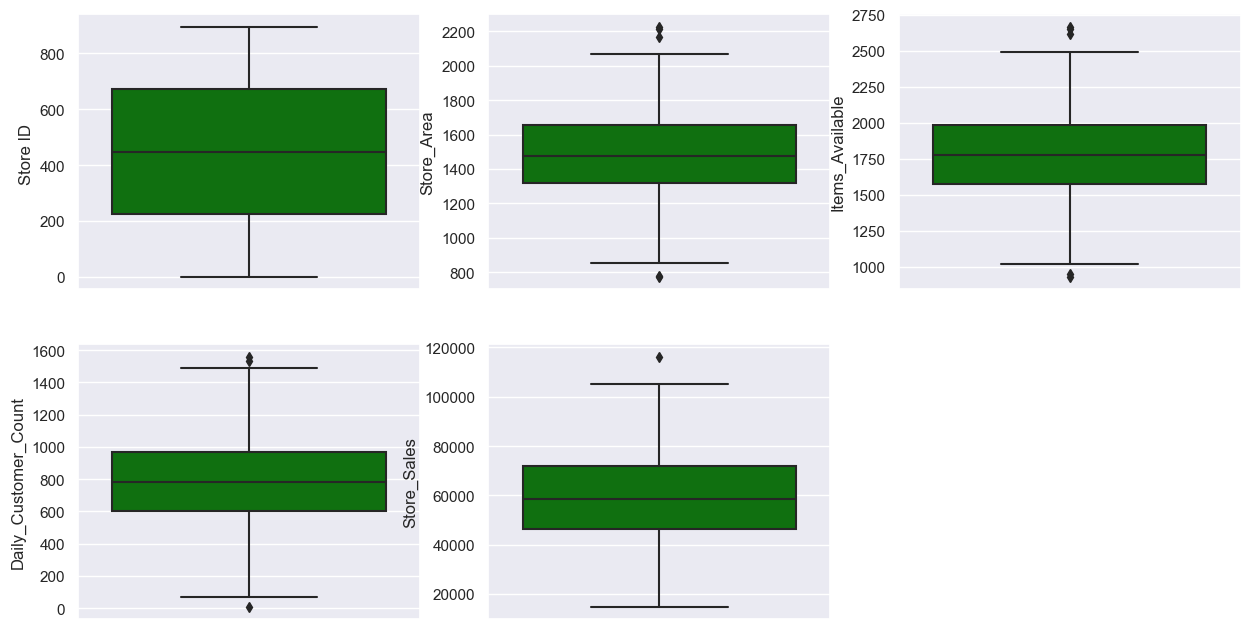

In [9]:
i = 1
plt.figure(figsize = (15,25))
for feature in store_sales.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y = store_sales[feature], color = 'green')
    i += 1

In [10]:
correlation = store_sales.corr()
correlation

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000


In [11]:
store_sales['Store_Area_Range'] = pd.qcut(store_sales['Store_Area'],10)
store_sales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Area_Range
0,1,1659,1961,530,66490,"(1614.5, 1703.0]"
1,2,1461,1752,210,39820,"(1429.0, 1477.0]"
2,3,1340,1609,720,54010,"(1252.0, 1359.0]"
3,4,1451,1748,620,53730,"(1429.0, 1477.0]"
4,5,1770,2111,450,46620,"(1703.0, 1828.0]"
...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,"(1539.0, 1614.5]"
892,893,1387,1663,850,82080,"(1359.0, 1429.0]"
893,894,1200,1436,1060,76440,"(1165.0, 1252.0]"
894,895,1299,1560,770,96610,"(1252.0, 1359.0]"


In [12]:
store_sales.groupby('Store_Area_Range').agg(['std','mean'])

Store ID              Store_Area               \
                          std        mean        std         mean   
Store_Area_Range                                                    
(774.999, 1165.0]  248.474281  480.769231  93.280181  1058.373626   
(1165.0, 1252.0]   254.503724  483.303371  25.914544  1212.932584   
(1252.0, 1359.0]   261.212161  437.842697  27.923112  1312.584270   
(1359.0, 1429.0]   254.473970  436.855556  20.819122  1394.588889   
(1429.0, 1477.0]   289.779189  432.766667  14.452747  1452.511111   
(1477.0, 1539.0]   236.032311  476.528090  18.137280  1509.247191   
(1539.0, 1614.5]   250.501046  471.539326  23.254740  1576.966292   
(1614.5, 1703.0]   261.755263  433.411111  26.558667  1655.311111   
(1703.0, 1828.0]   271.436856  414.146067  33.269437  1760.910112   
(1828.0, 2229.0]   256.720624  417.933333  82.925565  1924.811111   

                  Items_Available              Daily_Customer_Count  \
                              std         mean                  std   
Store_Area_Range                                                      
(774.999, 1165.0]      111.893637  1270.648352           277.587109   
(1165.0, 1252.0]        32.536073  1458.078652           248.534109   
(1252.0, 1359.0]        37.490418  1572.370787           277.437659   
(1359.0, 1429.0]        29.432470  1674.277778           252.377459   
(1429.0, 1477.0]        20.730613  1743.488889           274.301200   
(1477.0, 1539.0]        25.741035  1810.112360           252.672286   
(1539.0, 1614.5]        32.409353  1890.483146           270.222972   
(1614.5, 1703.0]        37.671290  1986.555556           273.385945   
(1703.0, 1828.0]        41.603349  2110.157303           233.474938   
(1828.0, 2229.0]       100.455261  2309.100000           295.483036   

                                Store_Sales                
                         mean           std          mean  
Store_Area_Range                                           
(774.999, 1165.0]  808.571429  17823.066582  57617.692308  
(1165.0, 1252.0]   819.662921  17721.469226  56217.865169  
(1252.0, 1359.0]   782.584270  18859.815118  59658.202247  
(1359.0, 1429.0]   776.666667  16395.303483  59323.666667  
(1429.0, 1477.0]   786.444444  16318.415964  57997.555556  
(1477.0, 1539.0]   778.988764  15650.397119  58571.348315  
(1539.0, 1614.5]   790.000000  17399.645450  59462.022472  
(1614.5, 1703.0]   765.111111  16133.995322  60812.888889  
(1703.0, 1828.0]   760.898876  17211.020025  59562.584270  
(1828.0, 2229.0]   794.333333  17787.551713  64272.000000

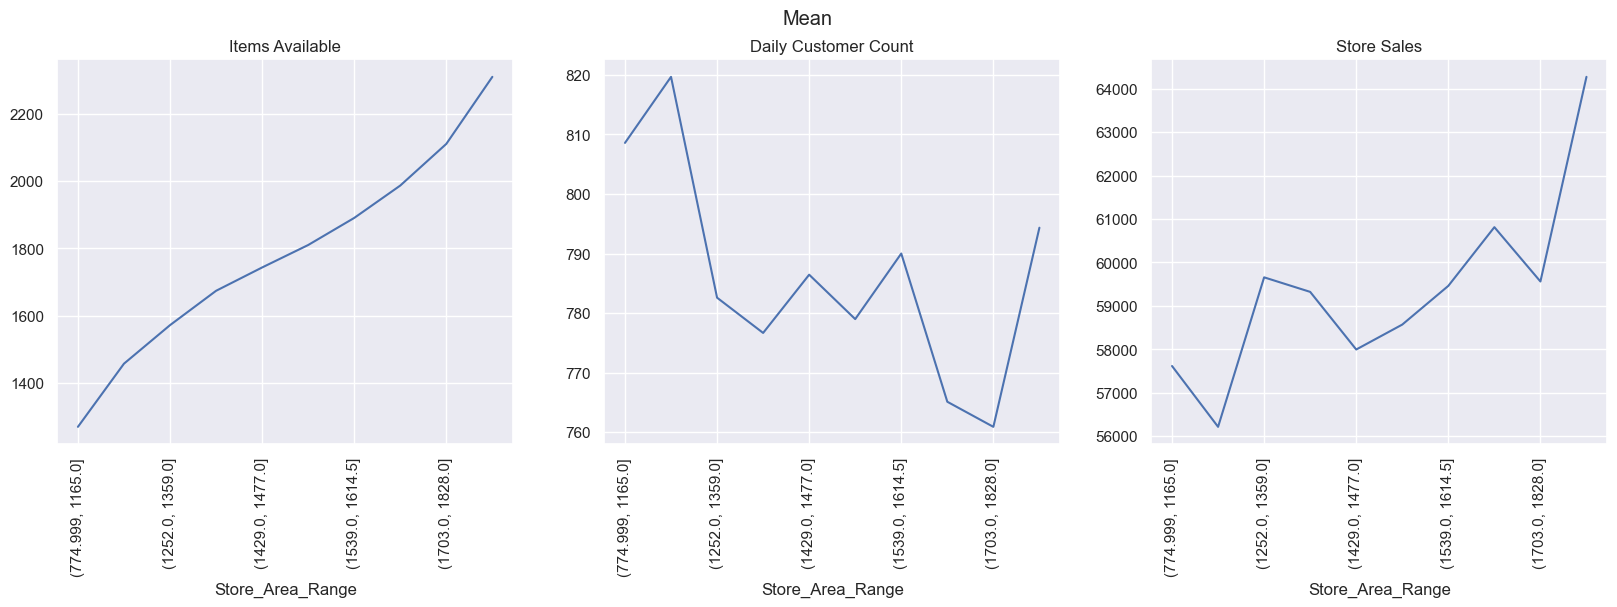

In [13]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
plt.suptitle('Mean')
store_sales.groupby('Store_Area_Range')['Items_Available'].mean().plot(rot=90, ax=axs[0], title='Items Available')
store_sales.groupby('Store_Area_Range')['Daily_Customer_Count'].mean().plot(rot=90, ax = axs[1], title='Daily Customer Count')
store_sales.groupby('Store_Area_Range')['Store_Sales'].mean().plot(rot=90, ax=axs[2], title='Store Sales')
plt.show()

In [14]:
store1_sales = store_sales.copy()
store1_sales["Store_Area_Range"] = store1_sales["Store_Area_Range"].astype('str')
store2_sales = store1_sales[store1_sales['Store_Area_Range'] == "(1165.0, 1252.0]"]
store2_sales.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Area_Range
10,11,1187,1439,1090,71280,"(1165.0, 1252.0]"
24,25,1234,1488,840,41880,"(1165.0, 1252.0]"
31,32,1250,1508,990,14920,"(1165.0, 1252.0]"
37,38,1174,1411,1080,62870,"(1165.0, 1252.0]"
45,46,1227,1471,870,49270,"(1165.0, 1252.0]"


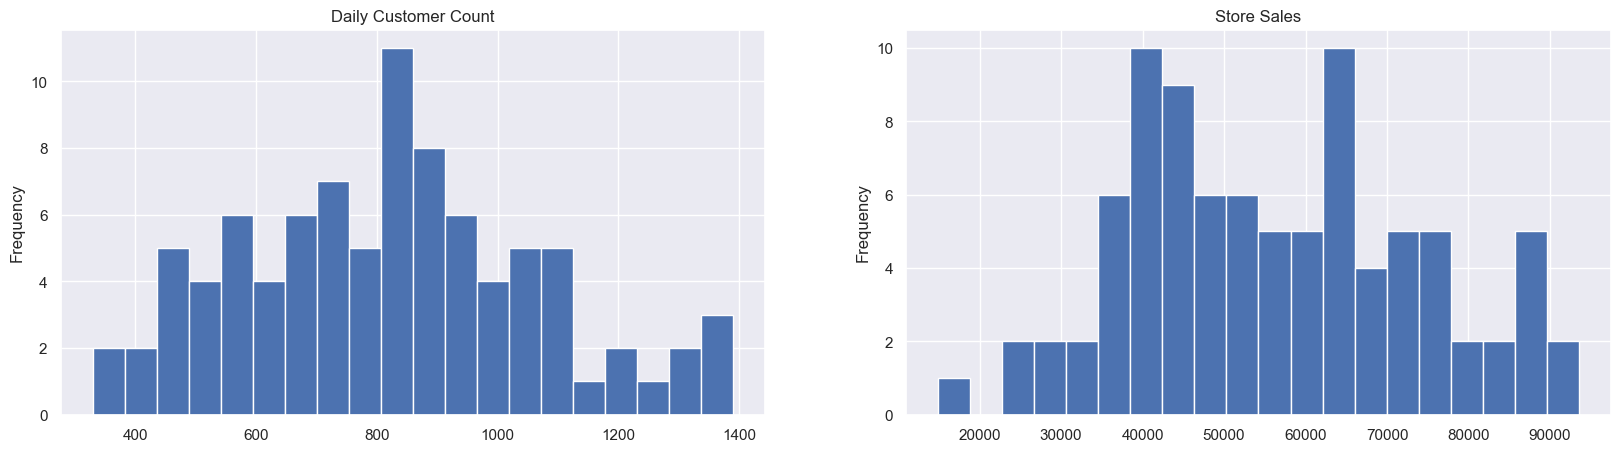

In [15]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
store2_sales['Daily_Customer_Count'].plot.hist(bins=20, ax=axs[0], title='Daily Customer Count')
store2_sales['Store_Sales'].plot.hist(bins=20, ax=axs[1], title='Store Sales')
plt.show()

In [16]:
store2_sales[(store2_sales['Store_Sales'] < 20000) | (store2_sales['Store_Sales'] > 90000)] 

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Area_Range
31,32,1250,1508,990,14920,"(1165.0, 1252.0]"
421,422,1175,1405,810,91200,"(1165.0, 1252.0]"
477,478,1244,1480,860,93530,"(1165.0, 1252.0]"


In [17]:
store2_sales[(store2_sales['Daily_Customer_Count']==store2_sales['Daily_Customer_Count'].min())|
             (store2_sales['Daily_Customer_Count']==store2_sales['Daily_Customer_Count'].max())]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Area_Range
77,78,1250,1475,1390,65560,"(1165.0, 1252.0]"
511,512,1247,1490,330,65750,"(1165.0, 1252.0]"


In [18]:
store_sales['avg_purchase'] = store_sales['Store_Sales'] / store_sales['Daily_Customer_Count']

store_sales.groupby('Store_Area_Range').agg({'Daily_Customer_Count':np.sum, 'avg_purchase':np.mean})

,Daily_Customer_Count,avg_purchase
Store_Area_Range,,
"(774.999, 1165.0]",73580,85.039409
"(1165.0, 1252.0]",72950,75.709326
"(1252.0, 1359.0]",69650,146.929870
"(1359.0, 1429.0]",69900,86.293359
"(1429.0, 1477.0]",70780,90.230194
"(1477.0, 1539.0]",69330,84.940541
"(1539.0, 1614.5]",70310,86.562314
"(1614.5, 1703.0]",68860,101.072862
"(1703.0, 1828.0]",67720,87.667138
